In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
air = pd.read_excel('/content/Airlines+Data.xlsx')
air.head()

,Month,Passengers
0,1995-01-01,112
1,1995-02-01,118
2,1995-03-01,132
3,1995-04-01,129
4,1995-05-01,121


In [3]:
air.shape

(96, 2)

In [4]:
air

,Month,Passengers
0,1995-01-01,112
1,1995-02-01,118
2,1995-03-01,132
3,1995-04-01,129
4,1995-05-01,121
...,...,...
91,2002-08-01,405
92,2002-09-01,355
93,2002-10-01,306
94,2002-11-01,271


In [5]:
air.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Month       96 non-null     datetime64[ns]
 1   Passengers  96 non-null     int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 1.6 KB


In [6]:
#  since Month column is already in datetime format no need to do change dtype, here it is coverted for practice

# Convert the "Month" column to datetime format
air['Month'] = pd.to_datetime(air['Month'])

air.rename(columns = {'Month' : 'Date'}, inplace = True)

air.head()

,Date,Passengers
0,1995-01-01,112
1,1995-02-01,118
2,1995-03-01,132
3,1995-04-01,129
4,1995-05-01,121


In [7]:
# Extract the year, month as number, quarter and month as name
air['Year'] = air['Date'].dt.year
air['Month_of_Year'] = air['Date'].dt.month # extraction of months as number
air['Quarter'] = air['Date'].dt.quarter
air["Month"] = air['Date'].dt.strftime("%b") # extraction of months as name
air

,Date,Passengers,Year,Month_of_Year,Quarter,Month
0,1995-01-01,112,1995,1,1,Jan
1,1995-02-01,118,1995,2,1,Feb
2,1995-03-01,132,1995,3,1,Mar
3,1995-04-01,129,1995,4,2,Apr
4,1995-05-01,121,1995,5,2,May
...,...,...,...,...,...,...
91,2002-08-01,405,2002,8,3,Aug
92,2002-09-01,355,2002,9,3,Sep
93,2002-10-01,306,2002,10,4,Oct
94,2002-11-01,271,2002,11,4,Nov


In [8]:
# Calculate the sequential month number
air['Sequential_Months'] = (air['Year'] - air['Year'].min()) * 12 + air['Month_of_Year']
air

,Date,Passengers,Year,Month_of_Year,Quarter,Month,Sequential_Months
0,1995-01-01,112,1995,1,1,Jan,1
1,1995-02-01,118,1995,2,1,Feb,2
2,1995-03-01,132,1995,3,1,Mar,3
3,1995-04-01,129,1995,4,2,Apr,4
4,1995-05-01,121,1995,5,2,May,5
...,...,...,...,...,...,...,...
91,2002-08-01,405,2002,8,3,Aug,92
92,2002-09-01,355,2002,9,3,Sep,93
93,2002-10-01,306,2002,10,4,Oct,94
94,2002-11-01,271,2002,11,4,Nov,95


In [9]:
# Create dummy columns for months
month_dummies = pd.get_dummies(air['Month_of_Year'], prefix='Month') # drop_first=True

# Rename the dummy columns to match the desired format
month_names = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

# Rename the columns using a dictionary
month_rename_dict = {f'Month_{i}': month_names[i - 1] for i in range(1, 13)}
month_dummies = month_dummies.rename(columns=month_rename_dict)

# Concatenate the dummy columns with the original DataFrame
df = pd.concat([air, month_dummies], axis=1)
df

,Date,Passengers,Year,Month_of_Year,Quarter,Month,Sequential_Months,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
0,1995-01-01,112,1995,1,1,Jan,1,1,0,0,0,0,0,0,0,0,0,0,0
1,1995-02-01,118,1995,2,1,Feb,2,0,1,0,0,0,0,0,0,0,0,0,0
2,1995-03-01,132,1995,3,1,Mar,3,0,0,1,0,0,0,0,0,0,0,0,0
3,1995-04-01,129,1995,4,2,Apr,4,0,0,0,1,0,0,0,0,0,0,0,0
4,1995-05-01,121,1995,5,2,May,5,0,0,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91,2002-08-01,405,2002,8,3,Aug,92,0,0,0,0,0,0,0,1,0,0,0,0
92,2002-09-01,355,2002,9,3,Sep,93,0,0,0,0,0,0,0,0,1,0,0,0
93,2002-10-01,306,2002,10,4,Oct,94,0,0,0,0,0,0,0,0,0,1,0,0
94,2002-11-01,271,2002,11,4,Nov,95,0,0,0,0,0,0,0,0,0,0,1,0


In [10]:
df.drop(columns = ['Month_of_Year'], inplace = True)

df.head()

,Date,Passengers,Year,Quarter,Month,Sequential_Months,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
0,1995-01-01,112,1995,1,Jan,1,1,0,0,0,0,0,0,0,0,0,0,0
1,1995-02-01,118,1995,1,Feb,2,0,1,0,0,0,0,0,0,0,0,0,0
2,1995-03-01,132,1995,1,Mar,3,0,0,1,0,0,0,0,0,0,0,0,0
3,1995-04-01,129,1995,2,Apr,4,0,0,0,1,0,0,0,0,0,0,0,0
4,1995-05-01,121,1995,2,May,5,0,0,0,0,1,0,0,0,0,0,0,0


<Axes: xlabel='Sequential_Months', ylabel='Passengers'>

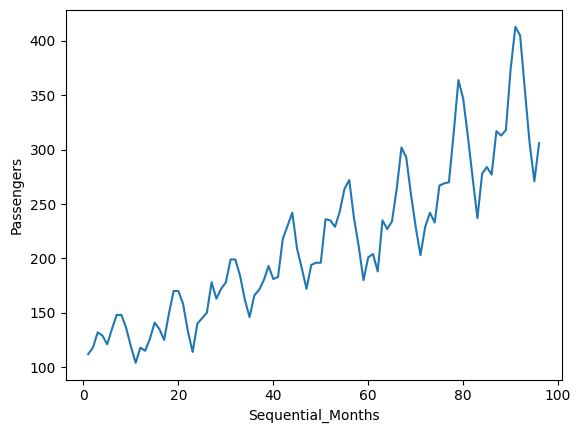

In [11]:
sns.lineplot(x= df['Sequential_Months'], y= df['Passengers'])

### Airlines_Passengers_data shows (over the period)
- upward trend
- multiplicative seasonality

In [12]:
pivot = pd.pivot_table(data=df, values="Passengers", index="Year", columns="Month", fill_value=0)
pivot

Month,Apr,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
Year,,,,,,,,,,,,
1995,129,148,118,118,112,148,135,132,121,104,119,136
1996,135,170,140,126,115,170,149,141,125,114,133,158
1997,163,199,166,150,145,199,178,178,172,146,162,184
1998,181,242,194,180,171,230,218,193,183,172,191,209
1999,235,272,201,196,196,264,243,236,229,180,211,237
2000,227,293,229,188,204,302,264,235,234,203,229,259
2001,269,347,278,233,242,364,315,267,270,237,274,312
2002,313,405,306,277,284,413,374,317,318,271,306,355


<Axes: xlabel='Month', ylabel='Year'>

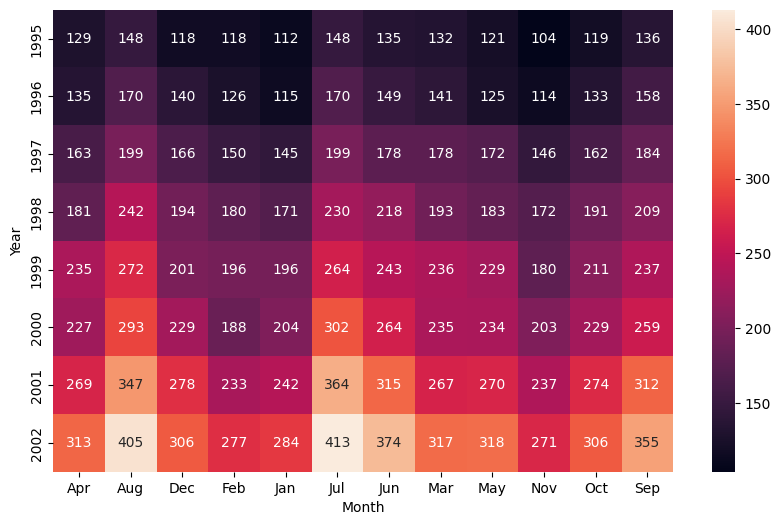

In [13]:
plt.figure(figsize=(10,6))
sns.heatmap(pivot, annot=True, fmt="g")

### above heatmap shows
- Aug, Jul, Jun, Sep months are fetching higher Passengers footsteps

<Axes: xlabel='Year', ylabel='Passengers'>

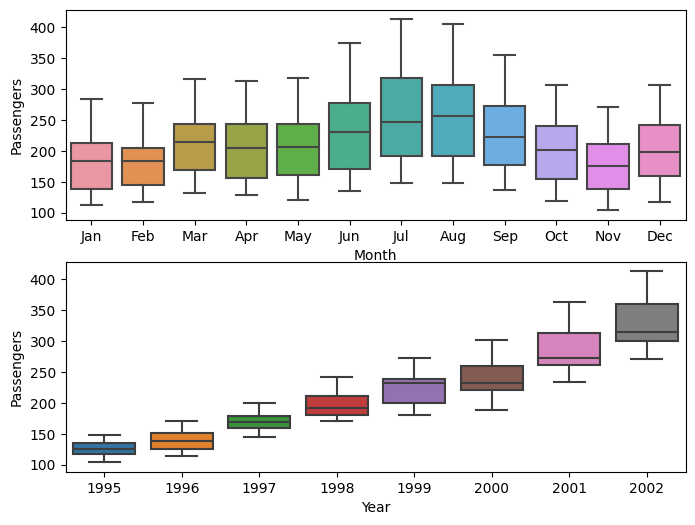

In [14]:
# Boxplots
plt.figure(figsize=(8,6))
plt.subplot(211)
sns.boxplot(x = "Month", y = "Passengers", data = df)
plt.subplot(212)
sns.boxplot(x = "Year", y = "Passengers", data = df)

### in the month of July there is surge in Passengers, it may be due to tourist arival from other countries (esp of equitorial regions) where summer is at peak at this time, they may be coming for holidays

<Axes: xlabel='Year', ylabel='Passengers'>

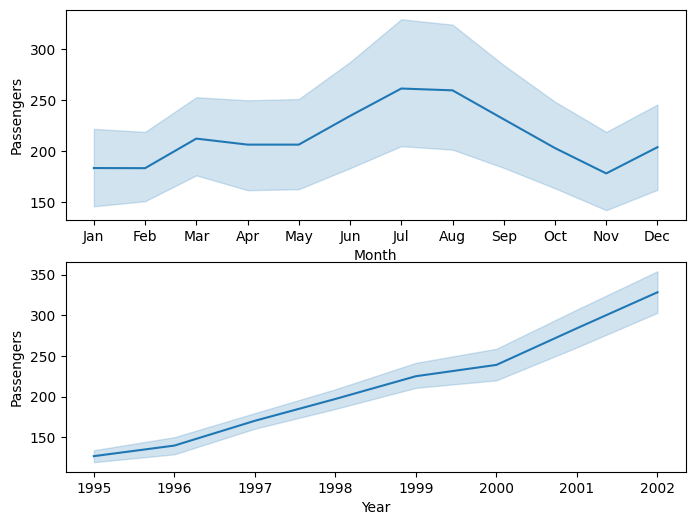

In [15]:
plt.figure(figsize=(8,6))
plt.subplot(211)
sns.lineplot(x = "Month", y = "Passengers", data = df)
plt.subplot(212)
sns.lineplot(x = "Year", y = "Passengers", data = df)

#Splitting of data

In [16]:
df.shape

(96, 18)

In [17]:
# manual splitting of data in 75:25 ratio for train and test

n1= int(0.75*df.shape[0])
n2= int(0.25*df.shape[0])
Train = df.head(n1)
Test = df.tail(n2)

print(Train.shape), print(Test.shape)

(72, 18)
(24, 18)


(None, None)

In [18]:
#Linear Model
import statsmodels.formula.api as smf

linear_model = smf.ols('Passengers~Sequential_Months', data = Train).fit()

pred_linear =  pd.Series(linear_model.predict(pd.DataFrame(Test['Sequential_Months'])))

rmse_linear = np.sqrt(np.mean((np.array(Test['Passengers'])-np.array(pred_linear))**2))
rmse_linear


51.667792995646266

# improve accuarcy by using Linear Transformations

In [19]:
df.columns

Index(['Date', 'Passengers', 'Year', 'Quarter', 'Month', 'Sequential_Months',
       'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct',
       'Nov', 'Dec'],
      dtype='object')

In [20]:
#Exponential Transformations

Expo_model = smf.ols('np.log(Passengers)~Sequential_Months', data = Train).fit()

input  = pd.DataFrame(Test['Sequential_Months'])

pred_Expo = np.exp(Expo_model.predict(input))

predicted = np.array(pred_Expo)

actual = Test['Passengers'].values

rmse_Expo = np.sqrt(np.mean((actual - predicted)**2))
rmse_Expo

42.55232894600461

In [21]:
#Quadratic Transformations

Quad_model = smf.ols('Passengers~Sequential_Months**2+Sequential_Months', data = Train).fit()

input = pd.DataFrame(Test[['Sequential_Months']])
input['Sequential_Months_squared'] = Test['Sequential_Months'] ** 2

pred_Quad = pd.Series(Quad_model.predict(input))
predicted = np.array(pred_Quad)

actual = Test['Passengers'].values


rmse_Quad = np.sqrt(np.mean((actual - predicted)**2))
rmse_Quad


51.667792995646266

In [22]:
#Additive seasonality
add_seas_model = smf.ols('Passengers~Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov', data = Train).fit()

input  = Test[['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov']]

pred_add_seas = pd.Series(add_seas_model.predict(input))
predicted = np.array(pred_add_seas)

actual = Test['Passengers'].values

rmse_add_seas = np.sqrt(np.mean((actual - predicted)**2))
rmse_add_seas


127.26451565320342

In [23]:
# Additive Seasonality Quadratic

add_sea_Quad_model = smf.ols('Passengers~Sequential_Months+np.square(Sequential_Months)+Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov', data=Train).fit()

input  = pd.DataFrame(Test[['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov', 'Sequential_Months']])
input['Sequential_Months_squared']= Test['Sequential_Months'] ** 2

pred_add_sea_quad = pd.Series(add_sea_Quad_model.predict(input))

predicted = np.array(pred_add_sea_quad)

actual = Test['Passengers'].values

rmse_add_seas_quad = np.sqrt(np.mean((actual - predicted)**2))
rmse_add_seas_quad

35.24160848594581

In [24]:
# Multiplicative Seasonality

Mul_seas_model = smf.ols('np.log(Passengers)~Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov',data = Train).fit()

input  = pd.DataFrame(Test[['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov']])

pred_Mult_sea = np.exp(Mul_seas_model.predict(Test))

predicted = np.array(pred_Mult_sea)

actual = Test['Passengers'].values

rmse_Mult_sea = np.sqrt(np.mean((actual - predicted)**2))
rmse_Mult_sea

132.18762800263474

In [25]:
#Multiplicative Additive Seasonality

Mul_Add_seas_model = smf.ols('np.log(Passengers)~Sequential_Months+Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov',data = Train).fit()

input  = pd.DataFrame(Test[['Sequential_Months','Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov']])

pred_Mul_Add_seas = np.exp(Mul_seas_model.predict(input))

predicted = np.array(pred_Mul_Add_seas)

actual = Test['Passengers'].values

rmse_Mult_add_sea = np.sqrt(np.mean((actual - predicted)**2))
rmse_Mult_add_sea

132.18762800263474

In [26]:
#Compare the results

data = {"MODEL":pd.Series(["rmse_linear","rmse_Expo","rmse_Quad","rmse_add_seas","rmse_add_seas_quad","rmse_Mult_sea","rmse_Mult_add_sea"]),
        "RMSE_Values":pd.Series([rmse_linear,rmse_Expo,rmse_Quad,rmse_add_seas,rmse_add_seas_quad,rmse_Mult_sea,rmse_Mult_add_sea])}
table_rmse=pd.DataFrame(data)
table_rmse.sort_values(['RMSE_Values'])

,MODEL,RMSE_Values
4,rmse_add_seas_quad,35.241608
1,rmse_Expo,42.552329
0,rmse_linear,51.667793
2,rmse_Quad,51.667793
3,rmse_add_seas,127.264516
5,rmse_Mult_sea,132.187628
6,rmse_Mult_add_sea,132.187628


### Out of all model built, Multiplicative additive seasonality model is best model

# Re-building of model based on Additive Seasonality Quadratic model


<Axes: >

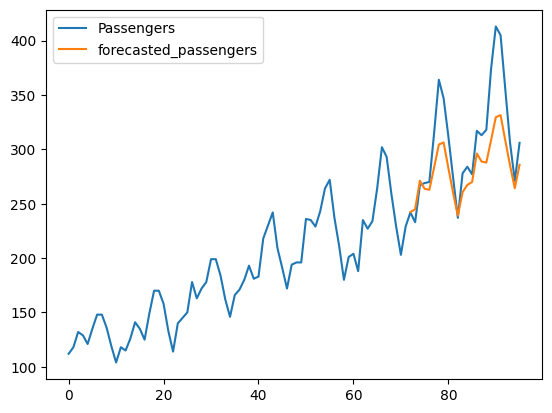

In [27]:
# Additive Seasonality Quadratic

add_sea_Quad_model = smf.ols('Passengers~Sequential_Months+np.square(Sequential_Months)+Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov', data=Train).fit()

input_test  = pd.DataFrame(Test[['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov', 'Sequential_Months']])
input_test['Sequential_Months_squared']= Test['Sequential_Months'] ** 2

pred_test = pd.Series(add_sea_Quad_model.predict(input))

predict_data = pd.DataFrame(Test)
predict_data["forecasted_passengers"] = pd.Series(pred_test)

new_var = pd.concat([Train, predict_data])

new_var[['Passengers','forecasted_passengers']].reset_index(drop=True).plot()

In [29]:
air.head()

,Date,Passengers,Year,Month_of_Year,Quarter,Month,Sequential_Months
0,1995-01-01,112,1995,1,1,Jan,1
1,1995-02-01,118,1995,2,1,Feb,2
2,1995-03-01,132,1995,3,1,Mar,3
3,1995-04-01,129,1995,4,2,Apr,4
4,1995-05-01,121,1995,5,2,May,5


/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:402: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.10/dist-packages/matplotlib/axes/_base.py:2503: UserWarning: Warning: converting a masked element to nan.
  xys = np.asarray(xys)


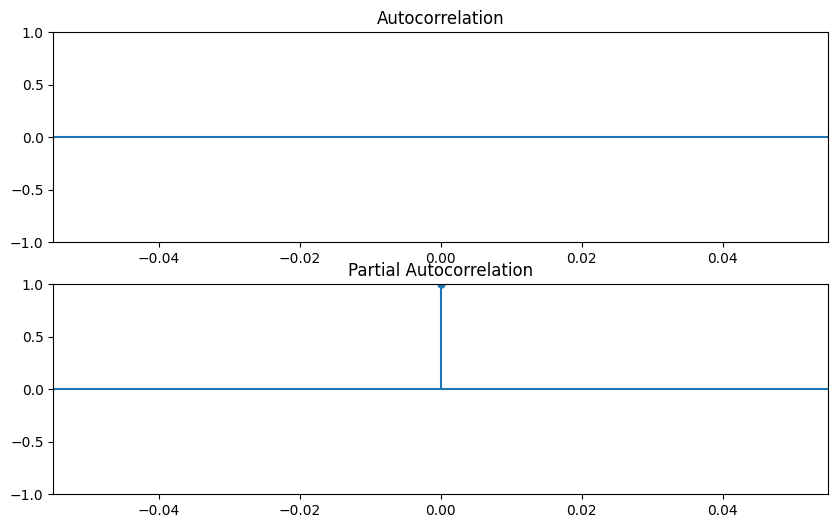

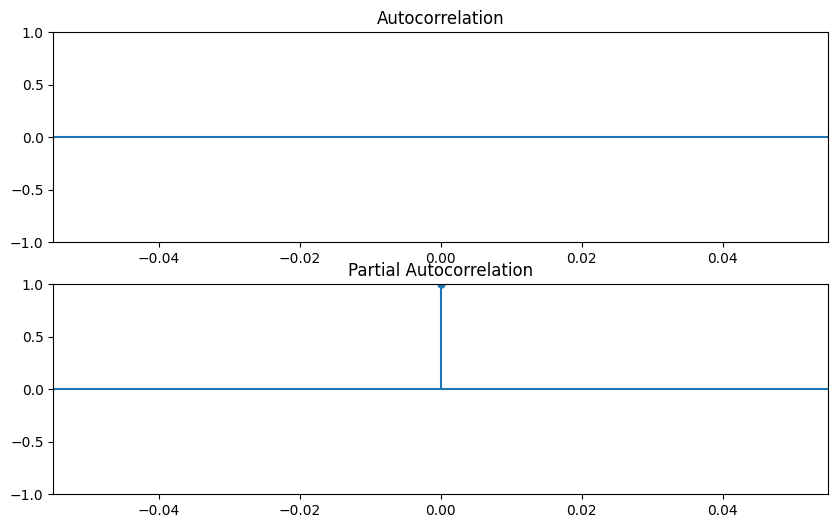

In [30]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf


# Create a DataFrame
df = pd.DataFrame(air)

# Step 1: Apply seasonal differencing and log transformation
# Seasonal differencing
seasonal_order = 12  # For yearly seasonality
df['Passengers_seasonal_diff'] = df['Passengers'] - df['Passengers'].shift(seasonal_order)
df['Passengers_seasonal_diff'].dropna(inplace=True)

# Log transformation
df['Passengers_log'] = np.log(df['Passengers_seasonal_diff'])

# Step 2: Plot ACF and PACF plots to select p, d, and q
fig, ax = plt.subplots(2, 1, figsize=(10, 6))
plot_acf(df['Passengers_log'], lags=40, ax=ax[0])
plot_pacf(df['Passengers_log'], lags=40, ax=ax[1])


# You should analyze the ACF and PACF plots to determine values of p, d, and q.
# Look for significant lags in ACF and PACF plots.


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


<Axes: >

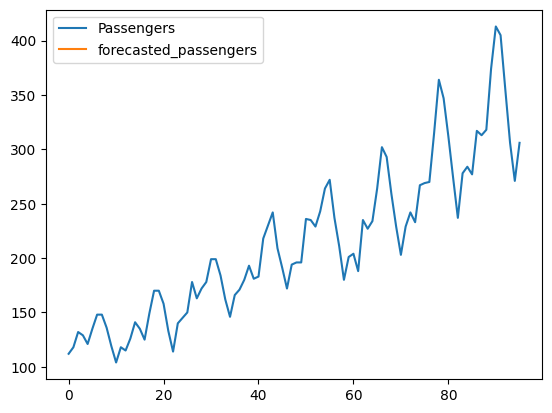

In [32]:

# Based on the plots, you can make an initial estimation of p and q values.

# Step 3: Fit the ARIMA model with selected p, d, and q
p = 1  # Initial estimate from PACF plot
d = 1  # We applied seasonal differencing
q = 1  # Initial estimate from ACF plot

model = sm.tsa.arima.ARIMA(df['Passengers_log'], order=(p, d, q))
results = model.fit()

# Step 4: Forecasting
forecasted_values = results.forecast(steps=len(df['Passengers_log']))  # Adjust the steps as needed

# Inverse the log transformation and differencing to get forecasts for the original series
df['forecasted_passengers_log'] = forecasted_values
df['forecasted_passengers_diff'] = np.exp(df['forecasted_passengers_log'])
df['forecasted_passengers'] = df['forecasted_passengers_diff'] + df['Passengers'].shift(seasonal_order)
df['forecasted_passengers'].dropna(inplace=True)

# Plot the actual and forecasted values
df[['Passengers', 'forecasted_passengers']].plot()



/usr/local/lib/python3.10/dist-packages/matplotlib/axes/_base.py:2503: UserWarning: Warning: converting a masked element to nan.
  xys = np.asarray(xys)


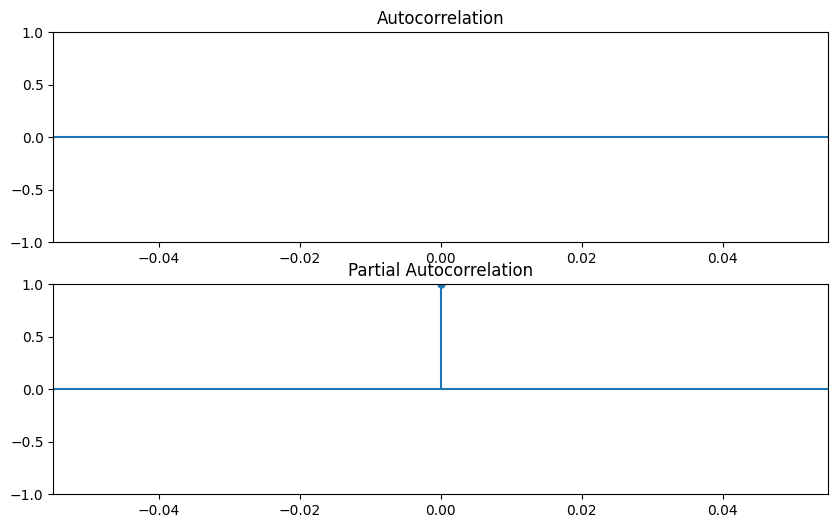

In [33]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Create a DataFrame
df2 = pd.DataFrame(air)

# Step 1: Apply seasonal differencing
# Yearly Seasonal differencing (assuming monthly data)
seasonal_order = 12  # For yearly seasonality
df2['Passengers_yearly_diff'] = df2['Passengers'] - df2['Passengers'].shift(seasonal_order)
df2['Passengers_yearly_diff'].dropna(inplace=True)

# Step 2: Plot ACF and PACF plots to select p, d, and q
fig, ax = plt.subplots(2, 1, figsize=(10, 6))
plot_acf(df2['Passengers_yearly_diff'], lags=40, ax=ax[0])
plot_pacf(df2['Passengers_yearly_diff'], lags=40, ax=ax[1])
plt.show()

# You should analyze the ACF and PACF plots to determine values of p, d, and q.
# Look for significant lags in ACF and PACF plots.


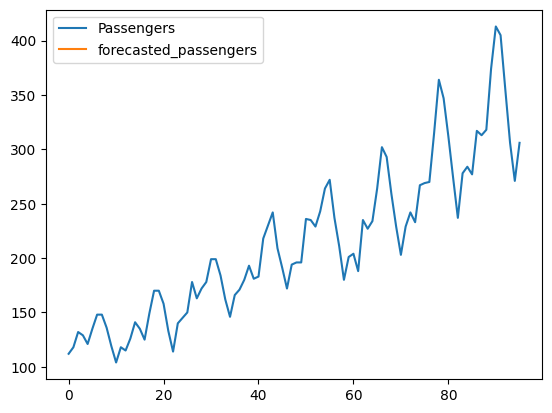

In [37]:

# Based on the plots, you can make an initial estimation of p and q values.

# Step 3: Fit the ARIMA model with selected p, d, and q
p = 0  # Initial estimate from PACF plot
d = 1  # We applied yearly seasonal differencing
q = 0  # Initial estimate from ACF plot

model = sm.tsa.arima.ARIMA(df2['Passengers_yearly_diff'], order=(p, d, q))
results = model.fit()

# Step 4: Forecasting
forecasted_values = results.forecast(steps=len(df2['Passengers_yearly_diff']))  # Adjust the steps as needed

# Inverse the seasonal differencing to get forecasts for the original series
df2['forecasted_passengers'] = forecasted_values + df2['Passengers'].shift(seasonal_order)
df2['forecasted_passengers'].dropna(inplace=True)

# Plot the actual and forecasted values
df2[['Passengers', 'forecasted_passengers']].plot()
plt.show()


# Observations
### Dummy Variables
- following are the Dummy Variables were made for our model building and visualisations
- ['Year', 'Quarter', 'Month', 'Sequential_Months', 'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
- Quarter Column were made for quarterly obseravtions
- Month column for monthly observations
- Year column for yearly observations
- 'Sequential_Months' column was made for getting squence of months in order to get continuity in monthly data points
- 'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec' dummy columns were made for getting Sales visualisations over the YoY data points

### data Obeservations
- heatmap shows Aug, Jul, Jun, Sep months are fetching higher Passengers footsteps
- Airlines_Passengers data shows (over the period) upward trend & multiplicative seasonality
- in the month of July there is surge in Passengers, it may be due to tourist arival from other countries (esp of equitorial regions) where summer is at peak at this time, they may be coming for holidays

### Best Model
- Out of all model built, Multiplicative additive seasonality model is best model
- model is predicting slightly below passengers turn out, which shows that an airport will be working very efficiently in current scenario but not at later stage as footprints shoots up with the time. This shows that we may opt for other machine learning or deep learning model. RNN (Recurrent Neural Network) will be better choice for us to meet the future demands.